# NFL Betting Modeling Project
### Authors: Jack Valian, Andrew Masur, Saul Hernandez
#### CPE695 - Applied Machine Learning


---

#### 1
### Importing of Packages and Un-Processed Dataset

In [104]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [105]:
# Jack, Saul, Andrew

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from scipy.special import expit as activation_function
from scipy.stats import truncnorm
from numpy import exp
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import seaborn as sbn
import statsmodels.api as sma
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn import metrics

df14 = pd.read_csv("FantasyPoints2014.csv")
df15 = pd.read_csv("FantasyPoints2015.csv")
df14 = df14.fillna(0)
df15 = df15.fillna(0)
data = pd.read_csv('nfldata.csv')
preseason_pr = pd.read_csv('nfl_preseason_power_rankings.csv')

In [106]:
data.head(5)

,season,date,away_team,away_osrs,away_dsrs,away_score,home_team,home_osrs,home_dsrs,home_score,line,over_under,sum_scores,away_minus_home
0,2014,9/4/2014,GB,7.9,0.4,16,SEA,2.4,7.1,36,-5.0,47.0,52,-20
1,2014,9/7/2014,NO,1.9,-4.8,34,ATL,0.6,-4.4,37,3.0,51.5,71,-3
2,2014,9/7/2014,MIN,-2.8,1.1,6,STL,-1.2,0.4,34,-3.0,43.5,40,-28
3,2014,9/7/2014,CLE,-4.8,0.9,27,PIT,4.4,-2.1,30,-6.0,41.5,57,-3
4,2014,9/7/2014,JAX,-7.8,-2.7,17,PHI,6.6,-2.7,34,-10.0,50.0,51,-17


In [107]:
df14.head(5)
df14.shape

(499, 33)

In [108]:
df15.head(5)

,Rk,Player,Tm,FantPos,Age,G,GS,Cmp,Att,Yds,...,TD.3,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
0,1.0,Devonta Freeman*,ATL,RB,23.0,15.0,13.0,0.0,0.0,0.0,...,14.0,0.0,0.0,243.0,316.4,324.4,279.9,123.0,1.0,1.0
1,2.0,Antonio Brown*+,PIT,WR,27.0,16.0,16.0,0.0,0.0,0.0,...,11.0,2.0,0.0,252.0,388.2,393.2,320.2,122.0,1.0,2.0
2,3.0,Adrian Peterson*+,MIN,RB,30.0,16.0,16.0,0.0,0.0,0.0,...,11.0,0.0,0.0,231.0,260.7,269.7,245.7,110.0,2.0,3.0
3,4.0,Julio Jones*+,ATL,WR,26.0,16.0,16.0,0.0,0.0,0.0,...,9.0,0.0,0.0,239.0,375.1,379.1,307.1,109.0,2.0,4.0
4,5.0,Cam Newton*+,CAR,QB,26.0,16.0,16.0,296.0,495.0,3837.0,...,10.0,0.0,0.0,389.0,389.1,409.1,399.1,105.0,1.0,5.0


In [109]:
data.head(5)

,season,date,away_team,away_osrs,away_dsrs,away_score,home_team,home_osrs,home_dsrs,home_score,line,over_under,sum_scores,away_minus_home
0,2014,9/4/2014,GB,7.9,0.4,16,SEA,2.4,7.1,36,-5.0,47.0,52,-20
1,2014,9/7/2014,NO,1.9,-4.8,34,ATL,0.6,-4.4,37,3.0,51.5,71,-3
2,2014,9/7/2014,MIN,-2.8,1.1,6,STL,-1.2,0.4,34,-3.0,43.5,40,-28
3,2014,9/7/2014,CLE,-4.8,0.9,27,PIT,4.4,-2.1,30,-6.0,41.5,57,-3
4,2014,9/7/2014,JAX,-7.8,-2.7,17,PHI,6.6,-2.7,34,-10.0,50.0,51,-17


In [110]:
preseason_pr.head(5)

,Team,2014 PreSeason Power Ranking,2015 PreSeason Power Ranking
0,HOU,25,18
1,DAL,21,11
2,BUF,31,19
3,GB,4,2
4,SF,3,22


#### 2
### Dataset Processing (Saul, Andrew, Jack)

In [111]:
# List of all teams as referenced in the fantasy dataset
teams = ['DAL','PIT','SEA','CHI','HOU','GNB','DEN','NWE','KAN','IND','NYG','BAL','ATL','PHI','MIA','SDG','CIN','TAM','NOR','WAS','CAR','DET','MIN','SFO','TEN','NYJ','BUF','ARI',
        'OAK','JAX','CLE','STL']

# List of all teams as referenced in the NFL Game dataset
Teams = ['DAL','PIT','SEA','CHI','HOU','GB','DEN','NE','KC','IND','NYG','BAL','ATL','PHI','MIA','SD','CIN','TB','NO','WSH','CAR','DET','MIN','SF','TEN','NYJ','BUF','ARI',
        'OAK','JAX','CLE','STL']

Creation of 2014 Player Fantasy Totals with 2015 Team Dataframe (Saul)

In [112]:
df14['Player'] = df14['Player'].str.replace('[*,+]','', regex = True)
df15['Player'] = df15['Player'].str.replace('[*,+]','', regex = True)

In [113]:
dftest = pd.DataFrame(df14.drop(labels='Tm', axis = 1))
dfteam = pd.DataFrame({'Player' : df15['Player'], 'Tm' : df15['Tm']})

In [114]:
fantasy = pd.merge(dftest, dfteam, on = 'Player', how='left').fillna(0)
fantasy = fantasy.drop(labels = 'Rk', axis = 1)

Creation of fantasy point totals dataframes (Andrew)

In [115]:
ftsy_pts_per_team_14 = []
ppr_pts_per_team_14 = []
for i in teams:
    ttl_ftsy_pts = 0
    ttl_ppr_pts = 0
    for j in range(0,len(df14['Tm'])):
        if df14['Tm'][j] == i:
            ttl_ftsy_pts += df14['FantPt'][j]
            ttl_ppr_pts += df14['PPR'][j]
    avg_ftsy_pts = ttl_ftsy_pts/16
    avg_ppr_pts = ttl_ppr_pts/16
    ftsy_pts_per_team_14.append(avg_ftsy_pts.round(2))
    ppr_pts_per_team_14.append(avg_ppr_pts.round(2))

ftsy_pts_per_team_15 = []
ppr_pts_per_team_15 = []
for i in teams:
    ttl_ftsy_pts = 0
    ttl_ppr_pts = 0
    for j in range(0,len(df15['Tm'])):
        if df15['Tm'][j] == i:
            ttl_ftsy_pts += df15['FantPt'][j]
            ttl_ppr_pts += df15['PPR'][j]
    avg_ftsy_pts = ttl_ftsy_pts/16
    avg_ppr_pts = ttl_ppr_pts/16
    ftsy_pts_per_team_15.append(avg_ftsy_pts.round(2))
    ppr_pts_per_team_15.append(avg_ppr_pts.round(2))

ftsy_pts_14_per_team_15 = []
ppr_pts_14_per_team_15 = []
for i in teams:
    ttl_ftsy_pts = 0
    ttl_ppr_pts = 0
    for j in range(0,len(fantasy['Tm'])):
        if fantasy['Tm'][j] == i:
            ttl_ftsy_pts += fantasy['FantPt'][j]
            ttl_ppr_pts += fantasy['PPR'][j]
    avg_ftsy_pts = ttl_ftsy_pts/16
    avg_ppr_pts = ttl_ppr_pts/16
    ftsy_pts_14_per_team_15.append(avg_ftsy_pts.round(2))
    ppr_pts_14_per_team_15.append(avg_ppr_pts.round(2))

In [116]:
FtsyData_away2014 = pd.DataFrame({
            'away_team': teams,
            'Avg Normal Scoring Away Ftsy Pts \'14': ftsy_pts_per_team_14,
            'Avg PPR Away Ftsy Pts \'14': ppr_pts_per_team_14
            })
FtsyData_home2014 = pd.DataFrame({
            'home_team': teams,
            'Avg Normal Scoring Home Ftsy Pts \'14': ftsy_pts_per_team_14,
            'Avg PPR Home Ftsy Pts \'14': ppr_pts_per_team_14
            })            
FtsyData_away2015 = pd.DataFrame({
            'away_team': teams,
            'Avg Normal Scoring Away Ftsy Pts \'15': ftsy_pts_per_team_15,
            'Avg PPR Away Ftsy Pts \'15': ppr_pts_per_team_15
            })
FtsyData_home2015 = pd.DataFrame({
            'home_team': teams,
            'Avg Normal Scoring Home Ftsy Pts \'15': ftsy_pts_per_team_15,
            'Avg PPR Home Ftsy Pts \'15': ppr_pts_per_team_15
            })        

team15_14data = pd.DataFrame({"team" : teams,
                              "2014 Fantasy Total" : ftsy_pts_14_per_team_15,
                              "2014 PPR" : ppr_pts_14_per_team_15}) 

Change Team Names to Align (Andrew, Saul)

In [117]:
warnings.filterwarnings('ignore')
data_arr_away = [FtsyData_away2014, FtsyData_away2015]
for FtsyData in data_arr_away:
    for i in range(0,len(FtsyData['away_team'])):
        if FtsyData['away_team'][i] == "TAM":
            FtsyData['away_team'][i] = "TB"
        elif FtsyData['away_team'][i] == "NWE": 
            FtsyData['away_team'][i]="NE"
        elif FtsyData['away_team'][i] == "NOR": 
            FtsyData['away_team'][i]="NO"
        elif FtsyData['away_team'][i] == "SFO": 
            FtsyData['away_team'][i]="SF"
        elif FtsyData['away_team'][i] == "SDG": 
            FtsyData['away_team'][i]="SD"
        elif FtsyData['away_team'][i] == "KAN": 
            FtsyData['away_team'][i]="KC"
        elif FtsyData['away_team'][i] == "GNB": 
            FtsyData['away_team'][i]="GB"
        elif FtsyData['away_team'][i] == "WAS": 
            FtsyData['away_team'][i]="WSH"

data_arr_home = [FtsyData_home2014, FtsyData_home2015]
for FtsyData in data_arr_home:
    for i in range(0,len(FtsyData['home_team'])):
        if FtsyData['home_team'][i] == "TAM":
            FtsyData['home_team'][i] = "TB"
        elif FtsyData['home_team'][i] == "NWE": 
            FtsyData['home_team'][i]="NE"
        elif FtsyData['home_team'][i] == "NOR": 
            FtsyData['home_team'][i]="NO"
        elif FtsyData['home_team'][i] == "SFO": 
            FtsyData['home_team'][i]="SF"
        elif FtsyData['home_team'][i] == "SDG": 
            FtsyData['home_team'][i]="SD"
        elif FtsyData['home_team'][i] == "KAN": 
            FtsyData['home_team'][i]="KC"
        elif FtsyData['home_team'][i] == "GNB": 
            FtsyData['home_team'][i]="GB"
        elif FtsyData['home_team'][i] == "WAS": 
            FtsyData['home_team'][i]="WSH"

avg_both = (team15_14data['2014 Fantasy Total']+team15_14data['2014 PPR'])/2
neu_teamdata = pd.DataFrame({'Team' : team15_14data['team'],
                    '2014 Fantasy' : avg_both})
neu_teamdata.head(5)

,Team,2014 Fantasy
0,DAL,73.455
1,PIT,90.895
2,SEA,87.820
3,CHI,76.680
4,HOU,64.245


Merging (Jack, Andrew, Saul)

In [118]:
data_2014 = data[data.season == 2014]
data_2015 = data[data.season == 2015]

datan_2015 = data[data.season == 2015]

preseason_pr_2014 = preseason_pr.iloc[:,0:2]
preseason_pr_2015 = preseason_pr.iloc[:,[0,2]]

preseason_pr_away2014 = preseason_pr_2014.rename(columns={'Team': 'away_team', 
                        '2014 PreSeason Power Ranking': 'Away PreSeason Power Ranking'})
preseason_pr_home2014 = preseason_pr_2014.rename(columns={'Team': 'home_team', 
                        '2014 PreSeason Power Ranking': 'Home PreSeason Power Ranking'})
preseason_pr_away2015 = preseason_pr_2015.rename(columns={'Team': 'away_team', 
                        '2015 PreSeason Power Ranking': 'Away PreSeason Power Ranking'})
preseason_pr_home2015 = preseason_pr_2015.rename(columns={'Team': 'home_team', 
                        '2015 PreSeason Power Ranking': 'Home PreSeason Power Ranking'})

NNData_away2015 = pd.DataFrame({
            'away_team': Teams,
            'fantasy': neu_teamdata['2014 Fantasy']
            })
NNData_home2015 = pd.DataFrame({
            'home_team': Teams,
            'fantasy': neu_teamdata['2014 Fantasy']
            })
nndata_arr_away = NNData_away2015
nndata_arr_home = NNData_home2015

data_2014 = pd.merge(data_2014, FtsyData_away2014, on = 'away_team', how='left')
data_2014 = pd.merge(data_2014, FtsyData_home2014, on = 'home_team', how='left')
data_2015 = pd.merge(data_2015, FtsyData_away2015, on = 'away_team', how='left')
data_2015 = pd.merge(data_2015, FtsyData_home2015, on = 'home_team', how='left')
data_2014 = pd.merge(data_2014, preseason_pr_away2014, on = 'away_team', how='left')
data_2014 = pd.merge(data_2014, preseason_pr_home2014, on = 'home_team', how='left')
data_2015 = pd.merge(data_2015, preseason_pr_away2015, on = 'away_team', how='left')
data_2015 = pd.merge(data_2015, preseason_pr_home2015, on = 'home_team', how='left')

datan_2015 = pd.merge(datan_2015, nndata_arr_away, on = 'away_team', how='left', suffixes=('','_away'))
datan_2015 = pd.merge(datan_2015, nndata_arr_home, on = 'home_team', how='left', suffixes=('','_home'))
datan_2015 = pd.merge(datan_2015, preseason_pr_away2015, on = 'away_team', how='left')
datan_2015 = pd.merge(datan_2015, preseason_pr_home2015, on = 'home_team', how='left')

In [119]:
data_2015.head(5)

,season,date,away_team,away_osrs,away_dsrs,away_score,home_team,home_osrs,home_dsrs,home_score,line,over_under,sum_scores,away_minus_home,Avg Normal Scoring Away Ftsy Pts '15,Avg PPR Away Ftsy Pts '15,Avg Normal Scoring Home Ftsy Pts '15,Avg PPR Home Ftsy Pts '15,Away PreSeason Power Ranking,Home PreSeason Power Ranking
0,2015,9/10/2015,PIT,5.1,3.6,21,NE,5.3,1.7,28,-7.0,51.0,49,-7,74.12,98.46,77.12,102.02,8,3
1,2015,9/13/2015,GB,2.0,3.3,31,CHI,-0.1,-1.2,23,6.5,48.0,54,8,66.56,88.37,60.44,81.05,2,25
2,2015,9/13/2015,KC,3.7,5.3,27,HOU,-3.3,2.6,20,1.0,41.0,47,7,61.31,80.60,60.44,82.46,10,18
3,2015,9/13/2015,CLE,-3.2,-2.9,10,NYJ,-0.5,2.0,31,-3.5,39.5,41,-21,57.25,80.13,70.06,92.51,27,26
4,2015,9/13/2015,IND,-3.1,-3.6,14,BUF,0.3,-0.2,27,1.0,44.5,41,-13,57.50,79.43,61.81,77.51,5,19


In [120]:
data_2014=data_2014.rename(columns={"line":"spread"})
data_2015=data_2015.rename(columns={"line":"spread"})

datan_2015=datan_2015.rename(columns={"line":"spread"})

In [121]:
datan_2015.head(5)

,season,date,away_team,away_osrs,away_dsrs,away_score,home_team,home_osrs,home_dsrs,home_score,spread,over_under,sum_scores,away_minus_home,fantasy,fantasy_home,Away PreSeason Power Ranking,Home PreSeason Power Ranking
0,2015,9/10/2015,PIT,5.1,3.6,21,NE,5.3,1.7,28,-7.0,51.0,49,-7,90.895,82.105,8,3
1,2015,9/13/2015,GB,2.0,3.3,31,CHI,-0.1,-1.2,23,6.5,48.0,54,8,79.490,76.680,2,25
2,2015,9/13/2015,KC,3.7,5.3,27,HOU,-3.3,2.6,20,1.0,41.0,47,7,69.520,64.245,10,18
3,2015,9/13/2015,CLE,-3.2,-2.9,10,NYJ,-0.5,2.0,31,-3.5,39.5,41,-21,55.215,70.105,27,26
4,2015,9/13/2015,IND,-3.1,-3.6,14,BUF,0.3,-0.2,27,1.0,44.5,41,-13,89.370,54.730,5,19


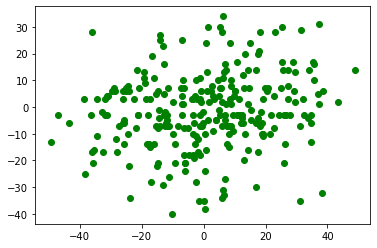

In [122]:
plt.plot((datan_2015['fantasy']-datan_2015['fantasy_home']),datan_2015['away_minus_home'], 'go')
plt.show()

We noticed a linear relationship between some of the features and the target variable

Creation of test and train data (Andrew, Saul)

In [123]:
train_nn, test_nn = train_test_split(datan_2015, test_size=0.2, random_state=7)

In [124]:
x_train = data_2014.drop(labels=['season','date', 'away_team', 'away_score', 'home_team',
                    'home_score', 'spread', 'over_under', 'sum_scores', 'away_minus_home','Avg PPR Away Ftsy Pts \'14', 
                    'Avg PPR Home Ftsy Pts \'14'], axis=1)
y_train = data_2014.loc[:,data_2014.columns == 'spread']

xtrain_nn = train_nn.drop(labels=['season','date', 'away_team', 'away_score', 'home_team',
                    'home_score', 'spread', 'over_under', 'away_osrs', 'home_osrs', 'sum_scores', 'away_minus_home'], axis=1)
ytrain_nn = train_nn.loc[:,train_nn.columns == 'away_minus_home']

xtest_nn = test_nn.drop(labels=['season','date', 'away_team', 'away_score', 'home_team',
                    'home_score', 'spread', 'over_under', 'away_osrs', 'home_osrs', 'sum_scores', 'away_minus_home'], axis=1)
ytest_nn = test_nn.loc[:,test_nn.columns == 'away_minus_home']

Testing for correlation (Andrew)

In [125]:
x_train.corr()

,away_osrs,away_dsrs,home_osrs,home_dsrs,Avg Normal Scoring Away Ftsy Pts '14,Avg Normal Scoring Home Ftsy Pts '14,Away PreSeason Power Ranking,Home PreSeason Power Ranking
away_osrs,1.000000,0.201038,-0.014855,0.054230,0.886500,-0.050826,-0.659024,0.019650
away_dsrs,0.201038,1.000000,0.055818,0.032248,-0.043209,-0.014748,-0.212003,0.000698
home_osrs,-0.014855,0.055818,1.000000,0.205497,-0.033873,0.884051,-0.029152,-0.654729
home_dsrs,0.054230,0.032248,0.205497,1.000000,-0.008134,-0.045879,-0.059399,-0.217203
Avg Normal Scoring Away Ftsy Pts '14,0.886500,-0.043209,-0.033873,-0.008134,1.000000,-0.023151,-0.682695,0.011161
Avg Normal Scoring Home Ftsy Pts '14,-0.050826,-0.014748,0.884051,-0.045879,-0.023151,1.000000,-0.018460,-0.673826
Away PreSeason Power Ranking,-0.659024,-0.212003,-0.029152,-0.059399,-0.682695,-0.018460,1.000000,0.063616
Home PreSeason Power Ranking,0.019650,0.000698,-0.654729,-0.217203,0.011161,-0.673826,0.063616,1.000000


In [126]:
xtrain_nn.corr()

,away_dsrs,home_dsrs,fantasy,fantasy_home,Away PreSeason Power Ranking,Home PreSeason Power Ranking
away_dsrs,1.000000,0.223182,0.232229,0.085585,-0.497992,-0.149665
home_dsrs,0.223182,1.000000,0.121404,0.171456,-0.178712,-0.488601
fantasy,0.232229,0.121404,1.000000,-0.030229,-0.651130,-0.066324
fantasy_home,0.085585,0.171456,-0.030229,1.000000,0.014056,-0.637239
Away PreSeason Power Ranking,-0.497992,-0.178712,-0.651130,0.014056,1.000000,0.037336
Home PreSeason Power Ranking,-0.149665,-0.488601,-0.066324,-0.637239,0.037336,1.000000


### Linear Regression Implementation (Retrospective Data) (Andrew)

In [127]:
x_train2 = sma.add_constant(x_train)
est1 = sma.OLS(y_train, x_train2)
est2 = est1.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 spread   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     92.38
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           2.83e-71
Time:                        18:15:47   Log-Likelihood:                -661.77
No. Observations:                 267   AIC:                             1342.
Df Residuals:                     258   BIC:                             1374.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [128]:
x_train = data_2014.drop(labels=['season','date', 'away_team', 'away_score', 'home_team',
                    'home_score', 'spread', 'over_under', 'sum_scores', 'away_minus_home','Avg PPR Away Ftsy Pts \'14', 
                    'Avg PPR Home Ftsy Pts \'14', 'home_osrs', 'away_osrs'], axis=1)
y_train = data_2014.loc[:,data_2014.columns == 'spread']

xtestn = datan_2015.drop(labels=['season','date', 'away_team', 'away_score', 'home_team',
                    'home_score', 'spread', 'over_under', 'away_osrs', 'home_osrs', 'sum_scores', 'away_minus_home'], axis=1)
ytestn = datan_2015.loc[:,datan_2015.columns == 'away_minus_home']

In [129]:
x_train2 = sma.add_constant(x_train)
est1 = sma.OLS(y_train, x_train2)
est2 = est1.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 spread   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     121.5
Date:                Thu, 15 Sep 2022   Prob (F-statistic):           1.78e-72
Time:                        18:15:47   Log-Likelihood:                -663.90
No. Observations:                 267   AIC:                             1342.
Df Residuals:                     260   BIC:                             1367.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [130]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
y_train_norm = scaler.fit_transform(y_train)

In [131]:
regr = LinearRegression()
regr.fit(x_train, y_train)
regr.score(x_train, y_train)

0.7370875405294404

In [132]:
x_test = data_2015.drop(labels=['season','date', 'away_team', 'away_score', 'home_team',
                    'home_score', 'spread', 'over_under', 'sum_scores', 'away_minus_home','Avg PPR Away Ftsy Pts \'15', 
                    'Avg PPR Home Ftsy Pts \'15', 'home_osrs', 'away_osrs'], axis=1)
y_test = data_2015.loc[:,data_2015.columns == 'spread']
scaler = StandardScaler()
x_test_norm = scaler.fit_transform(x_test)
y_test_norm = scaler.fit_transform(y_test)

In [133]:
y_pred = regr.predict(x_test)
y_pred = list(np.concatenate(y_pred).flat)

In [134]:
sample = pd.DataFrame({
            'Date' : data_2015['date'],
            '2015 Home Team' : data_2015['home_team'],
            '2015 Away Team' : data_2015['away_team'],
            '2015 Actual Spread' : data_2015['spread'],
            'Predicted Spread': y_pred,
            '2015 Actual Result': data_2015['away_minus_home']
             })
sample

,Date,2015 Home Team,2015 Away Team,2015 Actual Spread,Predicted Spread,2015 Actual Result
0,9/10/2015,NE,PIT,-7.0,-3.418734,-7
1,9/13/2015,CHI,GB,6.5,4.428094,8
2,9/13/2015,HOU,KC,1.0,-0.175881,7
3,9/13/2015,NYJ,CLE,-3.5,-7.062594,-21
4,9/13/2015,BUF,IND,1.0,-2.073123,-13
...,...,...,...,...,...,...
262,1/17/2016,CAR,SEA,-2.5,1.039665,-7
263,1/17/2016,DEN,PIT,-7.5,-1.778443,-7
264,1/24/2016,DEN,NE,3.0,-1.125676,-2
265,1/24/2016,CAR,ARI,-3.0,0.238869,-34


In [135]:
spread_diff = []
for i in range(0,len(sample['Predicted Spread'])):
    spread_diff.append(np.abs(sample['2015 Actual Spread'][i] - sample['Predicted Spread'][i]))

In [136]:
sample['spread_diff'] = spread_diff

# We are considering a difference of more than 3 points between the betting line and our predicted spread as a competitive edge,
#  and therefore a good opportunity to bet

betting_opps = sample[sample['spread_diff'] > 3]
betting_opps.drop(labels = 'spread_diff', axis = 1)

,Date,2015 Home Team,2015 Away Team,2015 Actual Spread,Predicted Spread,2015 Actual Result
0,9/10/2015,NE,PIT,-7.0,-3.418734,-7
3,9/13/2015,NYJ,CLE,-3.5,-7.062594,-21
4,9/13/2015,BUF,IND,1.0,-2.073123,-13
5,9/13/2015,WSH,MIA,3.5,-0.829143,7
8,9/13/2015,ARI,NO,-2.0,-9.184851,-12
...,...,...,...,...,...,...
262,1/17/2016,CAR,SEA,-2.5,1.039665,-7
263,1/17/2016,DEN,PIT,-7.5,-1.778443,-7
264,1/24/2016,DEN,NE,3.0,-1.125676,-2
265,1/24/2016,CAR,ARI,-3.0,0.238869,-34


The first betting algorithm goes through all the games where we believe there is a competitive edge and therefore deem it a safer bet to place and make money. Our competitive edge is defined as when there is a difference of more than 3 points between our model predictions and the betting line provided by the sportsbook.

The second betting algorithm goes through every game regardless of if we found there to be a compettive edge or not. 

Overall, often times the bets will be riskier when we do not pick and choose and bet on every game regardless of the competitve edge. We might not make as much money per bet this way than if we were a little more selective with our bets and only bet on games where we deem there to be a competitive edge.

In [137]:
win_count = 0
lose_count = 0
push_count = 0

# Running a loop through the indexes of the betting opportunities Dataframe we have called out above

for i in betting_opps.index:
    print('Actual Spread:', betting_opps['2015 Actual Spread'][i])
    print('Predicted Spread:', betting_opps['Predicted Spread'][i])
    print('Actual Result:', betting_opps['2015 Actual Result'][i])

    # if the spread is less than or equal to 0 it means that the home team is the favorite

    if betting_opps['2015 Actual Spread'][i] <= 0:

        # We want to see if our predicted spread is less than the actual spread, then we know that our model          
        # # is predicting that the home team should be even more of a favorite than what the sportsbook is saying
        # so we should bet on the home favorite.

        if betting_opps['Predicted Spread'][i] < betting_opps['2015 Actual Spread'][i]:
            print('Bet the Favorite at', betting_opps['2015 Actual Spread'][i])

            # We then compare the result to the actual spread provided by the sportsbook to see if we won, lost, or pushed

            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count+=1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1
        else:

            # If our predicted spread is not less than the actual spread, then we know that our model
            # is predicting that the home team should be less of a favorite than what the sportsbook is saying
            # so we should bet on the away underdog.

            print('Bet the Underdog at ', np.abs(betting_opps['2015 Actual Spread'][i]))

            # We then compare the result to the actual spread provided by the sportsbook to see if we won, lost, or pushed

            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1
    else:

        # if the spread is greater than 0 it means that the away team is the favorite

        if betting_opps['Predicted Spread'][i] < betting_opps['2015 Actual Spread'][i]:

            # We want to see if our predicted spread is less than the actual spread, then we know that our model
            # is predicting that the away team should be less of a favorite than what the sportsbook is saying
            # so we should bet on the home team underdog.

            print('Bet the Underdog at ', np.abs(betting_opps['2015 Actual Spread'][i]))

            # We then compare the result to the actual spread provided by the sportsbook to see if we won, lost, or pushed

            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count += 1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1
        else:

            # If our predicted spread is not less than the actual spread, then we know that our model
            # is predicting that the home team should be less of a favorite than what the sportsbook is saying
            # so we should bet on the away underdog.

            print('Bet the Favorite at', np.negative(betting_opps['2015 Actual Spread'][i]))

            # We then compare the result to the actual spread provided by the sportsbook to see if we won, lost, or pushed

            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1

Actual Spread: -7.0
Predicted Spread: -3.418733953371594
Actual Result: -7
Bet the Underdog at  7.0
PUSH

Actual Spread: -3.5
Predicted Spread: -7.062594283962861
Actual Result: -21
Bet the Favorite at -3.5
WIN

Actual Spread: 1.0
Predicted Spread: -2.0731232541941207
Actual Result: -13
Bet the Underdog at  1.0
WIN

Actual Spread: 3.5
Predicted Spread: -0.8291430622588882
Actual Result: 7
Bet the Underdog at  3.5
LOSE

Actual Spread: -2.0
Predicted Spread: -9.184851265240894
Actual Result: -12
Bet the Favorite at -2.0
WIN

Actual Spread: -6.0
Predicted Spread: -1.938168121359151
Actual Result: -1
Bet the Underdog at  6.0
WIN

Actual Spread: 2.5
Predicted Spread: -0.9796725611266786
Actual Result: -2
Bet the Underdog at  2.5
WIN

Actual Spread: -6.0
Predicted Spread: -11.499168966223321
Actual Result: -25
Bet the Favorite at -6.0
WIN

Actual Spread: -9.0
Predicted Spread: -4.717597692493575
Actual Result: 7
Bet the Underdog at  9.0
WIN

Actual Spread: 1.5
Predicted Spread: 5.49995072213

In [138]:
# We do the same as the above, but we follow the model no matter what (Even if there is a difference of 0.1 points)

win_count2 = 0
lose_count2 = 0
push_count2 = 0
for i in sample.index:
    print('Actual Spread:', sample['2015 Actual Spread'][i])
    print('Predicted Spread:', sample['Predicted Spread'][i])
    print('Actual Result:', sample['2015 Actual Result'][i])
    if sample['2015 Actual Spread'][i] <= 0:        
        if sample['Predicted Spread'][i] < sample['2015 Actual Spread'][i]:
            print('Bet the Favorite at', sample['2015 Actual Spread'][i])
            if sample['2015 Actual Result'][i] < sample['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count2+=1
            elif sample['2015 Actual Result'][i] > sample['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count2+=1
            else:
                print('PUSH')
                print()
                push_count2+=1
        else:
            print('Bet the Underdog at ', np.abs(sample['2015 Actual Spread'][i]))
            if sample['2015 Actual Result'][i] < sample['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count2+=1
            elif sample['2015 Actual Result'][i] > sample['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count2+=1
            else:
                print('PUSH')
                print()
                push_count2+=1
    else:
        if sample['Predicted Spread'][i] < sample['2015 Actual Spread'][i]:
            print('Bet the Underdog at ', np.abs(sample['2015 Actual Spread'][i]))
            if sample['2015 Actual Result'][i] < sample['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count2 += 1
            elif sample['2015 Actual Result'][i] > sample['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count2+=1
            else:
                print('PUSH')
                print()
                push_count2+=1
        else:
            print('Bet the Favorite at', np.negative(sample['2015 Actual Spread'][i]))
            if sample['2015 Actual Result'][i] < sample['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count2+=1
            elif sample['2015 Actual Result'][i] > sample['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count2+=1
            else:
                print('PUSH')
                print()
                push_count2+=1

Actual Spread: -7.0
Predicted Spread: -3.418733953371594
Actual Result: -7
Bet the Underdog at  7.0
PUSH

Actual Spread: 6.5
Predicted Spread: 4.428093693889382
Actual Result: 8
Bet the Underdog at  6.5
LOSE

Actual Spread: 1.0
Predicted Spread: -0.17588138278486065
Actual Result: 7
Bet the Underdog at  1.0
LOSE

Actual Spread: -3.5
Predicted Spread: -7.062594283962861
Actual Result: -21
Bet the Favorite at -3.5
WIN

Actual Spread: 1.0
Predicted Spread: -2.0731232541941207
Actual Result: -13
Bet the Underdog at  1.0
WIN

Actual Spread: 3.5
Predicted Spread: -0.8291430622588882
Actual Result: 7
Bet the Underdog at  3.5
LOSE

Actual Spread: 3.0
Predicted Spread: 4.421960738885179
Actual Result: 11
Bet the Favorite at -3.0
WIN

Actual Spread: 3.5
Predicted Spread: 5.826702341344225
Actual Result: -3
Bet the Favorite at -3.5
LOSE

Actual Spread: -2.0
Predicted Spread: -9.184851265240894
Actual Result: -12
Bet the Favorite at -2.0
WIN

Actual Spread: -3.5
Predicted Spread: -2.19526333378119

In [139]:
print(win_count)
print(win_count2)

67
151


In [140]:
print(lose_count)
print(lose_count2)

21
106


In [141]:
print(push_count)
print(push_count2)

3
10


In [142]:
# Assuming every game had -110 odds both ways and betting 100 dollars each time
money_made_on_wins = (100/110) * 100 * win_count
money_lost_on_losses = 100 * lose_count
print('Total money made on', len(betting_opps), 'bets, only the games we determine there is an edge, is $', 
        round(money_made_on_wins-money_lost_on_losses,2))
money_made_on_wins_all = (100/110) * 100 * win_count2
money_lost_on_losses_all = 100 * lose_count2
print('Total money made on all', len(sample), 'games is $', 
        round(money_made_on_wins_all-money_lost_on_losses_all,2))

print('Only betting when we determine there is a significant edge, we make $', 
        round((money_made_on_wins - money_lost_on_losses)/len(betting_opps),2), 'per bet.')
print('Betting on all games regardless of if there is an edge or not, we make $', 
        round((money_made_on_wins_all-money_lost_on_losses_all)/len(sample),2), 'per bet.')

Total money made on 91 bets, only the games we determine there is an edge, is $ 3990.91
Total money made on all 267 games is $ 3127.27
Only betting when we determine there is a significant edge, we make $ 43.86 per bet.
Betting on all games regardless of if there is an edge or not, we make $ 11.71 per bet.


PCA (Andrew)

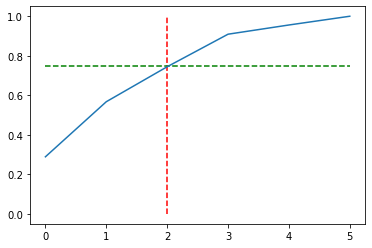

In [143]:
#Decide the number of PCA components based on the retained information
pca = PCA()
pca.fit(x_train_norm)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.vlines(x=2, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.75, xmax=5, xmin=0, colors="g", linestyles="--")
plt.plot(explained_variance)
plt.show()

We wanted to find the number of principal components that would capture 75% of the variance. 3 principal components was shown to be the best (0 = the first principal component)

In [144]:
pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(x_train_norm)

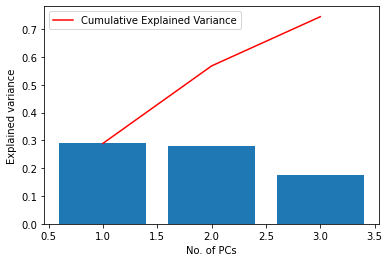

In [145]:
plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance')
plt.xlabel('No. of PCs')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')
plt.show()

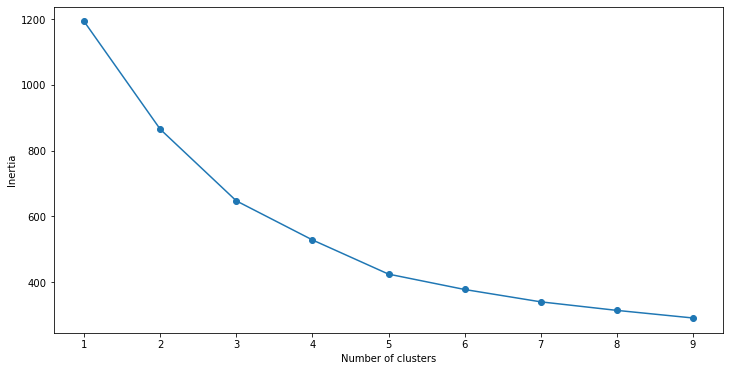

In [146]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(x_train_pca)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

To find the proper number of clusters, we decided to use the elbow method. We found the proper number of clusters should be 3, as that is the point where inertia decreases at a slower rate with an increase of number of clusters.

Kmeans (Andrew)

In [147]:
#Initialize the class object
kmeans = KMeans(n_clusters= 3, init='k-means++')
 
#predict the labels of clusters.
label = kmeans.fit_predict(x_train_pca)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 0.49392177  1.50297425 -0.09371093]
 [ 1.10528146 -1.04339243 -0.01855673]
 [-1.21398607 -0.18504974  0.0781183 ]]


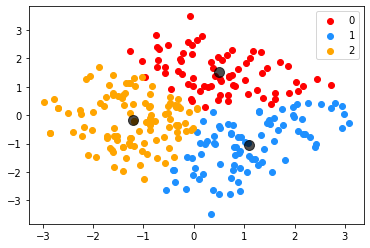

In [148]:
filtered_label0 = x_train_pca[label == 0]
filtered_label1 = x_train_pca[label == 1]
filtered_label2 = x_train_pca[label == 2]
# filtered_label3 = x_train_pca[label == 3]
# filtered_label4 = x_train_pca[label == 4]
# filtered_label5 = x_train_pca[label == 5]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1], color='r', label = '0')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1], color='dodgerblue', label = '1')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1], color='orange', label = '2')
# plt.scatter(filtered_label3[:,0] , filtered_label3[:,1], color='lawngreen', label = '3')
# plt.scatter(filtered_label4[:,0] , filtered_label4[:,1], color='pink', label = '4')
# plt.scatter(filtered_label5[:,0] , filtered_label5[:,1], color='y', label='5')
for c in centroids:
    plt.scatter(c[0], c[1], color='k', s=100, alpha=0.7)
plt.legend()
plt.show()

### Random Forrest Regression (Retrospective Data) (Jack)

In [149]:
#Random Forrest Regression
model = RandomForestRegressor(n_estimators=500)
x_test = data_2015.drop(labels=['season','date', 'away_team', 'away_score', 'home_team',
                    'home_score', 'spread', 'over_under', 'sum_scores', 'away_minus_home','Avg PPR Away Ftsy Pts \'15', 
                    'Avg PPR Home Ftsy Pts \'15', 'home_osrs', 'away_osrs'], axis=1)
y_test = data_2015.loc[:,data_2015.columns == 'spread']

#Did not use the normalized data

scaler = StandardScaler()
x_test_norm = scaler.fit_transform(x_test_norm)
y_test_norm = scaler.fit_transform(y_test_norm)

scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train_norm)
y_train_norm = scaler.fit_transform(y_train_norm)

model.fit(x_train_norm,y_train_norm)

RandomForestRegressor(n_estimators=500)

In [150]:
y_pred = model.predict(x_test_norm)

In [151]:
r2_score(y_test_norm,y_pred)

0.5028366796096813

In [152]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_norm, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_norm, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_norm, y_pred)))

Mean Absolute Error: 0.5768374389646749
Mean Squared Error: 0.49716332039031874
Root Mean Squared Error: 0.7050980927433563


In [153]:
betting_opps = pd.DataFrame({
            'Date' : data_2015['date'],
            '2015 Home Team' : data_2015['home_team'],
            '2015 Away Team' : data_2015['away_team'],
            'RandomForrestYPred' : y_pred,
            '2015 Actual Spread' : data_2015['spread'],
            '2015 Actual Result': data_2015['away_minus_home']
            
             })
betting_opps.head(5)


,Date,2015 Home Team,2015 Away Team,RandomForrestYPred,2015 Actual Spread,2015 Actual Result
0,9/10/2015,NE,PIT,-0.493084,-7.0,-7
1,9/13/2015,CHI,GB,1.348786,6.5,8
2,9/13/2015,HOU,KC,0.167135,1.0,7
3,9/13/2015,NYJ,CLE,-0.657029,-3.5,-21
4,9/13/2015,BUF,IND,0.378230,1.0,-13


In [154]:
spread_diff = []
for i in range(0,len(betting_opps['RandomForrestYPred'])):
    spread_diff.append(np.abs(betting_opps['2015 Actual Spread'][i] - betting_opps['RandomForrestYPred'][i]))

betting_opps['spread_diff'] = spread_diff
betting_opps = betting_opps[betting_opps['spread_diff'] > 3]
betting_opps=betting_opps.drop(labels='spread_diff',axis=1)

In [155]:
# Refer to the first intstance for the explaining comments

win_count = 0
lose_count = 0
push_count = 0
for i in betting_opps.index:
    print('Actual Spread:', betting_opps['2015 Actual Spread'][i])
    print('Random Forrest Predicted Spread:', betting_opps['RandomForrestYPred'][i])
    print('Actual Result:', betting_opps['2015 Actual Result'][i])
    if betting_opps['2015 Actual Spread'][i] <= 0:        
        if betting_opps['RandomForrestYPred'][i] < betting_opps['2015 Actual Spread'][i]:
            print('Bet the Favorite at', betting_opps['2015 Actual Spread'][i])
            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count+=1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1
        else:
            print('Bet the Underdog at ', np.abs(betting_opps['2015 Actual Spread'][i]))
            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1
    else:
        if betting_opps['RandomForrestYPred'][i] < betting_opps['2015 Actual Spread'][i]:
            print('Bet the Underdog at ', np.abs(betting_opps['2015 Actual Spread'][i]))
            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count += 1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1
        else:
            print('Bet the Favorite at', np.negative(betting_opps['2015 Actual Spread'][i]))
            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1

Actual Spread: -7.0
Random Forrest Predicted Spread: -0.4930836081950749
Actual Result: -7
Bet the Underdog at  7.0
PUSH

Actual Spread: 6.5
Random Forrest Predicted Spread: 1.3487861579864069
Actual Result: 8
Bet the Underdog at  6.5
LOSE

Actual Spread: 3.5
Random Forrest Predicted Spread: -0.026682054164256716
Actual Result: 7
Bet the Underdog at  3.5
LOSE

Actual Spread: -3.5
Random Forrest Predicted Spread: 0.014432133454654024
Actual Result: -5
Bet the Underdog at  3.5
LOSE

Actual Spread: -4.5
Random Forrest Predicted Spread: -0.7401330963488458
Actual Result: -6
Bet the Underdog at  4.5
LOSE

Actual Spread: -6.0
Random Forrest Predicted Spread: 0.16119967513485361
Actual Result: -1
Bet the Underdog at  6.0
WIN

Actual Spread: -3.0
Random Forrest Predicted Spread: 0.6049578665447932
Actual Result: 7
Bet the Underdog at  3.0
WIN

Actual Spread: -6.0
Random Forrest Predicted Spread: -1.1909669712769622
Actual Result: -25
Bet the Underdog at  6.0
LOSE

Actual Spread: -9.0
Random Fo

In [156]:
print("Win Count")
print(win_count)


print("----------------")

print("Loss Count")
print(lose_count)

Win Count
86
----------------
Loss Count
72


<Figure size 10800x10800 with 0 Axes>

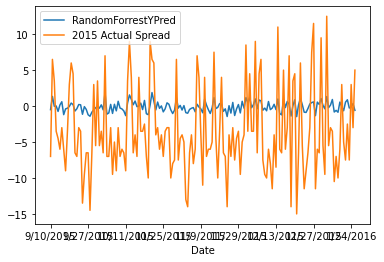

In [157]:
plt.figure(figsize=(150,150))
betting_opps.plot(x='Date', y=["RandomForrestYPred", "2015 Actual Spread"])
plt.show()

### Neural Network (Unreflective Data) (Saul)

In [158]:
def create_vif(dataframe):
       
    #create an empty dataframe
    vif_table = pd.DataFrame()
    #populate the first column with the columns of the dataset
    vif_table['variables'] = dataframe.columns
    #calculate the VIF of each column and create a VIF column to store the number
    vif_table['VIF'] = [vif(dataframe.values, i) for i in range(xtrain_nn.shape[1])]
    
    return vif_table

#print the VIF table for each variable
print(create_vif(xtrain_nn))

                      variables        VIF
0                     away_dsrs   1.363321
1                     home_dsrs   1.346807
2                       fantasy  21.337215
3                  fantasy_home  22.048419
4  Away PreSeason Power Ranking   5.931650
5  Home PreSeason Power Ranking   5.712161


In [159]:
pca = PCA(n_components=1)
#call the compressed column 'new'
xtrain_nn['new'] = pca.fit_transform(xtrain_nn[['fantasy', 'fantasy_home']])
#drop the columns from the dataset
xtrain_nn = xtrain_nn.drop(['fantasy', 'fantasy_home'], axis=1)

pca = PCA(n_components=1)
#call the compressed column 'new'
xtest_nn['new'] = pca.fit_transform(xtest_nn[['fantasy', 'fantasy_home']])
#drop the columns from the dataset
xtest_nn = xtest_nn.drop(['fantasy', 'fantasy_home'], axis=1)

In [160]:
xtest_nn2 = datan_2015.drop(labels=['season','date', 'away_team', 'away_score', 'home_team',
                    'home_score', 'spread', 'over_under', 'away_osrs', 'home_osrs', 'sum_scores', 'away_minus_home'], axis=1)
ytest_nn2 = datan_2015.loc[:,datan_2015.columns == 'away_minus_home']

pca = PCA(n_components=1)
#call the compressed column 'new'
xtest_nn2['new'] = pca.fit_transform(xtest_nn2[['fantasy', 'fantasy_home']])
#drop the columns from the dataset
xtest_nn2 = xtest_nn2.drop(['fantasy', 'fantasy_home'], axis=1)

In [161]:
xtest_nn2

,away_dsrs,home_dsrs,Away PreSeason Power Ranking,Home PreSeason Power Ranking,new
0,3.6,1.7,8,3,-10.183934
1,3.3,-1.2,2,25,-4.200300
2,5.3,2.6,10,18,-3.521592
3,-2.9,2.0,27,26,11.477652
4,-3.6,-0.2,5,19,-25.153628
...,...,...,...,...,...
262,6.0,2.1,1,20,-22.682180
263,3.6,5.5,8,4,-9.967947
264,1.7,5.5,3,4,-2.882110
265,3.4,2.1,9,20,-2.331560


In [162]:
xtrain_nn.head(5)

,away_dsrs,home_dsrs,Away PreSeason Power Ranking,Home PreSeason Power Ranking,new
132,-0.2,2.0,19,26,13.145585
98,-2.9,3.6,27,23,9.725928
213,5.3,-1.2,10,7,-5.562597
158,5.8,3.4,13,9,4.320236
111,4.7,-1.2,14,25,19.276047


In [163]:
ytrain_nn.head(5)

,away_minus_home
132,5
98,-18
213,20
158,-3
111,3


In [164]:
#built the neural network architecture
model = Sequential()
model.add(Dense(5, input_dim=5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))

In [165]:
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [166]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 10)                60        
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [167]:
history = model.fit(xtrain_nn, ytrain_nn, epochs=200, verbose = 0, validation_data=(xtest_nn, ytest_nn))

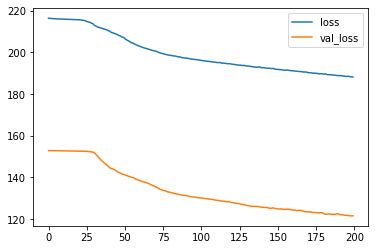

In [168]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

Graph of training dataset loss and validation dataset loss. The two converge, but further training could cause overfitting to the training dataset.

In [169]:
len(xtest_nn)

54

In [170]:
model.evaluate(xtest_nn, ytest_nn, batch_size=54)

1/1 [==============================] - 0s 10ms/step - loss: 121.6320 - mse: 121.6320 - mae: 8.0393


[121.6319808959961, 121.6319808959961, 8.039254188537598]

2/2 [==============================] - 0s 2ms/step


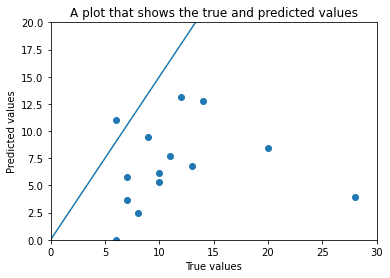

In [171]:
ytest_pred = model.predict(xtest_nn).flatten()

a = plt.axes(aspect='equal')
plt.scatter(ytest_nn, ytest_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
plt.xlim([0, 30])
plt.ylim([0, 20])
plt.plot([0, 20], [0, 30])

Simulating Neural Network Results (Andrew, Saul)

In [172]:
ypred_nn = model.predict(xtest_nn2)
ypred_nn = list(np.concatenate(ypred_nn).flat)

9/9 [==============================] - 0s 498us/step


In [173]:
sample = pd.DataFrame({
            'Date' : datan_2015['date'],
            '2015 Home Team' : datan_2015['home_team'],
            '2015 Away Team' : datan_2015['away_team'],
            '2015 Actual Spread' : datan_2015['spread'],
            'Predicted Spread': ypred_nn,
            '2015 Actual Result': datan_2015['away_minus_home']
            })
sample.head(5)

,Date,2015 Home Team,2015 Away Team,2015 Actual Spread,Predicted Spread,2015 Actual Result
0,9/10/2015,NE,PIT,-7.0,0.602725,-7
1,9/13/2015,CHI,GB,6.5,10.466623,8
2,9/13/2015,HOU,KC,1.0,5.809412,7
3,9/13/2015,NYJ,CLE,-3.5,-1.082161,-21
4,9/13/2015,BUF,IND,1.0,-1.070733,-13


In [174]:
spread_diff = []
for i in range(0,len(sample['Predicted Spread'])):
    spread_diff.append(np.abs(sample['2015 Actual Spread'][i] - sample['Predicted Spread'][i]))

In [175]:
sample['spread_diff'] = spread_diff
betting_opps = sample[sample['spread_diff'] > 3]
betting_opps.drop(labels = 'spread_diff', axis = 1)

,Date,2015 Home Team,2015 Away Team,2015 Actual Spread,Predicted Spread,2015 Actual Result
0,9/10/2015,NE,PIT,-7.0,0.602725,-7
1,9/13/2015,CHI,GB,6.5,10.466623,8
2,9/13/2015,HOU,KC,1.0,5.809412,7
5,9/13/2015,WSH,MIA,3.5,-1.082161,7
6,9/13/2015,JAX,CAR,3.0,8.450160,11
...,...,...,...,...,...,...
262,1/17/2016,CAR,SEA,-2.5,8.920618,-7
263,1/17/2016,DEN,PIT,-7.5,-1.082161,-7
264,1/24/2016,DEN,NE,3.0,-1.082161,-2
265,1/24/2016,CAR,ARI,-3.0,2.406031,-34


In [176]:
# Refer to the first intstance for the explaining comments

win_count = 0
lose_count = 0
push_count = 0
for i in betting_opps.index:
    print('Actual Spread:', betting_opps['2015 Actual Spread'][i])
    print('Predicted Spread:', betting_opps['Predicted Spread'][i])
    print('Actual Result:', betting_opps['2015 Actual Result'][i])
    if betting_opps['2015 Actual Spread'][i] <= 0:        
        if betting_opps['Predicted Spread'][i] < betting_opps['2015 Actual Spread'][i]:
            print('Bet the Favorite at', betting_opps['2015 Actual Spread'][i])
            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count+=1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1
        else:
            print('Bet the Underdog at ', np.abs(betting_opps['2015 Actual Spread'][i]))
            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1
    else:
        if betting_opps['Predicted Spread'][i] < betting_opps['2015 Actual Spread'][i]:
            print('Bet the Underdog at ', np.abs(betting_opps['2015 Actual Spread'][i]))
            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count += 1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1
        else:
            print('Bet the Favorite at', np.negative(betting_opps['2015 Actual Spread'][i]))
            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1

Actual Spread: -7.0
Predicted Spread: 0.602725
Actual Result: -7
Bet the Underdog at  7.0
PUSH

Actual Spread: 6.5
Predicted Spread: 10.466623
Actual Result: 8
Bet the Favorite at -6.5
WIN

Actual Spread: 1.0
Predicted Spread: 5.809412
Actual Result: 7
Bet the Favorite at -1.0
WIN

Actual Spread: 3.5
Predicted Spread: -1.082161
Actual Result: 7
Bet the Underdog at  3.5
LOSE

Actual Spread: 3.0
Predicted Spread: 8.45016
Actual Result: 11
Bet the Favorite at -3.0
WIN

Actual Spread: 3.5
Predicted Spread: 8.103775
Actual Result: -3
Bet the Favorite at -3.5
LOSE

Actual Spread: 3.0
Predicted Spread: 10.106709
Actual Result: 20
Bet the Favorite at -3.0
WIN

Actual Spread: -4.5
Predicted Spread: -1.082161
Actual Result: -6
Bet the Underdog at  4.5
LOSE

Actual Spread: -6.0
Predicted Spread: -1.082161
Actual Result: -1
Bet the Underdog at  6.0
WIN

Actual Spread: 2.5
Predicted Spread: -1.082161
Actual Result: -2
Bet the Underdog at  2.5
WIN

Actual Spread: 2.0
Predicted Spread: 7.783616
Actua

In [177]:
# Refer to the first intstance for the explaining comments

win_count2 = 0
lose_count2 = 0
push_count2 = 0
for i in sample.index:
    print('Actual Spread:', sample['2015 Actual Spread'][i])
    print('Predicted Spread:', sample['Predicted Spread'][i])
    print('Actual Result:', sample['2015 Actual Result'][i])
    if sample['2015 Actual Spread'][i] <= 0:        
        if sample['Predicted Spread'][i] < sample['2015 Actual Spread'][i]:
            print('Bet the Favorite at', sample['2015 Actual Spread'][i])
            if sample['2015 Actual Result'][i] < sample['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count2+=1
            elif sample['2015 Actual Result'][i] > sample['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count2+=1
            else:
                print('PUSH')
                print()
                push_count2+=1
        else:
            print('Bet the Underdog at ', np.abs(sample['2015 Actual Spread'][i]))
            if sample['2015 Actual Result'][i] < sample['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count2+=1
            elif sample['2015 Actual Result'][i] > sample['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count2+=1
            else:
                print('PUSH')
                print()
                push_count2+=1
    else:
        if sample['Predicted Spread'][i] < sample['2015 Actual Spread'][i]:
            print('Bet the Underdog at ', np.abs(sample['2015 Actual Spread'][i]))
            if sample['2015 Actual Result'][i] < sample['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count2 += 1
            elif sample['2015 Actual Result'][i] > sample['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count2+=1
            else:
                print('PUSH')
                print()
                push_count2+=1
        else:
            print('Bet the Favorite at', np.negative(sample['2015 Actual Spread'][i]))
            if sample['2015 Actual Result'][i] < sample['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count2+=1
            elif sample['2015 Actual Result'][i] > sample['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count2+=1
            else:
                print('PUSH')
                print()
                push_count2+=1

Actual Spread: -7.0
Predicted Spread: 0.602725
Actual Result: -7
Bet the Underdog at  7.0
PUSH

Actual Spread: 6.5
Predicted Spread: 10.466623
Actual Result: 8
Bet the Favorite at -6.5
WIN

Actual Spread: 1.0
Predicted Spread: 5.809412
Actual Result: 7
Bet the Favorite at -1.0
WIN

Actual Spread: -3.5
Predicted Spread: -1.082161
Actual Result: -21
Bet the Underdog at  3.5
LOSE

Actual Spread: 1.0
Predicted Spread: -1.0707334
Actual Result: -13
Bet the Underdog at  1.0
WIN

Actual Spread: 3.5
Predicted Spread: -1.082161
Actual Result: 7
Bet the Underdog at  3.5
LOSE

Actual Spread: 3.0
Predicted Spread: 8.45016
Actual Result: 11
Bet the Favorite at -3.0
WIN

Actual Spread: 3.5
Predicted Spread: 8.103775
Actual Result: -3
Bet the Favorite at -3.5
LOSE

Actual Spread: -2.0
Predicted Spread: -1.082161
Actual Result: -12
Bet the Underdog at  2.0
LOSE

Actual Spread: -3.5
Predicted Spread: -1.082161
Actual Result: -5
Bet the Underdog at  3.5
LOSE

Actual Spread: -3.0
Predicted Spread: -1.082

In [178]:
print(win_count)
print(win_count2)

111
156


In [179]:
print(lose_count)
print(lose_count2)

62
101


In [180]:
print(push_count)
print(push_count2)

7
10


In [181]:
# Assuming every game had -110 odds both ways and betting 100 dollars each time
money_made_on_wins = (100/110) * 100 * win_count
money_lost_on_losses = 100 * lose_count
print('Total money made on', len(betting_opps), 'bets, only the games we determine there is an edge, is $', 
        round(money_made_on_wins-money_lost_on_losses,2))
money_made_on_wins_all = (100/110) * 100 * win_count2
money_lost_on_losses_all = 100 * lose_count2
print('Total money made on all', len(sample), 'games is $', 
        round(money_made_on_wins_all-money_lost_on_losses_all,2))

print('Only betting when we determine there is a significant edge, we make $', 
        round((money_made_on_wins - money_lost_on_losses)/len(betting_opps),2), 'per bet.')
print('Betting on all games regardless of if there is an edge or not, we make $', 
        round((money_made_on_wins_all-money_lost_on_losses_all)/len(sample),2), 'per bet.')

Total money made on 180 bets, only the games we determine there is an edge, is $ 3890.91
Total money made on all 267 games is $ 4081.82
Only betting when we determine there is a significant edge, we make $ 21.62 per bet.
Betting on all games regardless of if there is an edge or not, we make $ 15.29 per bet.


### Linear Regression (Unreflective Data) (Andrew, Saul)

In [182]:
xtrain_nn = train_nn.drop(labels=['season','date', 'away_team', 'away_score', 'home_team',
                    'home_score', 'spread', 'over_under', 'away_osrs', 'home_osrs', 'sum_scores', 'away_minus_home'], axis=1)
ytrain_nn = train_nn.loc[:,train_nn.columns == 'away_minus_home']

xtest_nn2 = datan_2015.drop(labels=['season','date', 'away_team', 'away_score', 'home_team',
                    'home_score', 'spread', 'over_under', 'away_osrs', 'home_osrs', 'sum_scores', 'away_minus_home'], axis=1)

ytest_nn2 = datan_2015.loc[:,test_nn.columns == 'away_minus_home']

pca = PCA(n_components=1)
#call the compressed column 'new'
#xtest_nn2['new'] = pca.fit_transform(xtest_nn2[['fantasy', 'fantasy_home']])
#drop the columns from the dataset
#xtest_nn2 = xtest_nn2.drop(['fantasy', 'fantasy_home'], axis=1)

xtest_nn2.head(5)

,away_dsrs,home_dsrs,fantasy,fantasy_home,Away PreSeason Power Ranking,Home PreSeason Power Ranking
0,3.6,1.7,90.895,82.105,8,3
1,3.3,-1.2,79.490,76.680,2,25
2,5.3,2.6,69.520,64.245,10,18
3,-2.9,2.0,55.215,70.105,27,26
4,-3.6,-0.2,89.370,54.730,5,19


In [183]:
nn_new = sma.add_constant(xtrain_nn)
estn1 = sma.OLS(ytrain_nn, xtrain_nn)
estn2 = estn1.fit()
print(estn2.summary())

                                 OLS Regression Results                                
Dep. Variable:        away_minus_home   R-squared (uncentered):                   0.207
Model:                            OLS   Adj. R-squared (uncentered):              0.184
Method:                 Least Squares   F-statistic:                              8.998
Date:                Thu, 15 Sep 2022   Prob (F-statistic):                    9.70e-09
Time:                        18:15:55   Log-Likelihood:                         -850.18
No. Observations:                 213   AIC:                                      1712.
Df Residuals:                     207   BIC:                                      1733.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [184]:
scaler = StandardScaler()
xtrainnorm_nn = scaler.fit_transform(xtrain_nn)
ytrainnorm_nn = scaler.fit_transform(ytrain_nn)

In [185]:
# Did not help
#xtrain_nn2 = sma.add_constant(xtrainnorm_nn)
#estn1 = sma.OLS(ytrainnorm_nn, xtrainnorm_nn)
#estn2 = estn1.fit()
#print(estn2.summary())

In [186]:
regr_n = LinearRegression()
regr_n.fit(xtrain_nn, ytrain_nn)
regr_n.score(xtrain_nn, ytrain_nn)

0.20045763733202848

In [187]:
ypred_nn = regr_n.predict(xtest_nn2)
ypred_nn = list(np.concatenate(ypred_nn).flat)

In [188]:
sample = pd.DataFrame({
            'Date' : datan_2015['date'],
            '2015 Home Team' : datan_2015['home_team'],
            '2015 Away Team' : datan_2015['away_team'],
            '2015 Actual Spread' : datan_2015['spread'],
            'Predicted Spread': ypred_nn,
            '2015 Actual Result': datan_2015['away_minus_home']
            })
sample

,Date,2015 Home Team,2015 Away Team,2015 Actual Spread,Predicted Spread,2015 Actual Result
0,9/10/2015,NE,PIT,-7.0,1.346672,-7
1,9/13/2015,CHI,GB,6.5,4.515714,8
2,9/13/2015,HOU,KC,1.0,2.446191,7
3,9/13/2015,NYJ,CLE,-3.5,-10.151810,-21
4,9/13/2015,BUF,IND,1.0,-2.739798,-13
...,...,...,...,...,...,...
262,1/17/2016,CAR,SEA,-2.5,6.318466,-7
263,1/17/2016,DEN,PIT,-7.5,-3.786811,-7
264,1/24/2016,DEN,NE,3.0,-6.158774,-2
265,1/24/2016,CAR,ARI,-3.0,1.196207,-34


In [189]:
spread_diff = []
for i in range(0,len(sample['Predicted Spread'])):
    spread_diff.append(np.abs(sample['2015 Actual Spread'][i] - sample['Predicted Spread'][i]))

In [190]:
sample['spread_diff'] = spread_diff
betting_opps = sample[sample['spread_diff'] > 3]
betting_opps.drop(labels = 'spread_diff', axis = 1)

,Date,2015 Home Team,2015 Away Team,2015 Actual Spread,Predicted Spread,2015 Actual Result
0,9/10/2015,NE,PIT,-7.0,1.346672,-7
3,9/13/2015,NYJ,CLE,-3.5,-10.151810,-21
4,9/13/2015,BUF,IND,1.0,-2.739798,-13
5,9/13/2015,WSH,MIA,3.5,-1.106370,7
6,9/13/2015,JAX,CAR,3.0,9.820996,11
...,...,...,...,...,...,...
262,1/17/2016,CAR,SEA,-2.5,6.318466,-7
263,1/17/2016,DEN,PIT,-7.5,-3.786811,-7
264,1/24/2016,DEN,NE,3.0,-6.158774,-2
265,1/24/2016,CAR,ARI,-3.0,1.196207,-34


In [191]:
# Refer to the first intstance for the explaining comments

win_count = 0
lose_count = 0
push_count = 0
for i in betting_opps.index:
    print('Actual Spread:', betting_opps['2015 Actual Spread'][i])
    print('Predicted Spread:', betting_opps['Predicted Spread'][i])
    print('Actual Result:', betting_opps['2015 Actual Result'][i])
    if betting_opps['2015 Actual Spread'][i] <= 0:        
        if betting_opps['Predicted Spread'][i] < betting_opps['2015 Actual Spread'][i]:
            print('Bet the Favorite at', betting_opps['2015 Actual Spread'][i])
            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count+=1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1
        else:
            print('Bet the Underdog at ', np.abs(betting_opps['2015 Actual Spread'][i]))
            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1
    else:
        if betting_opps['Predicted Spread'][i] < betting_opps['2015 Actual Spread'][i]:
            print('Bet the Underdog at ', np.abs(betting_opps['2015 Actual Spread'][i]))
            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count += 1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1
        else:
            print('Bet the Favorite at', np.negative(betting_opps['2015 Actual Spread'][i]))
            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1

Actual Spread: -7.0
Predicted Spread: 1.346672192322631
Actual Result: -7
Bet the Underdog at  7.0
PUSH

Actual Spread: -3.5
Predicted Spread: -10.151810426806064
Actual Result: -21
Bet the Favorite at -3.5
WIN

Actual Spread: 1.0
Predicted Spread: -2.739798122761253
Actual Result: -13
Bet the Underdog at  1.0
WIN

Actual Spread: 3.5
Predicted Spread: -1.1063702795053185
Actual Result: 7
Bet the Underdog at  3.5
LOSE

Actual Spread: 3.0
Predicted Spread: 9.82099593267272
Actual Result: 11
Bet the Favorite at -3.0
WIN

Actual Spread: -2.0
Predicted Spread: -15.353049392051823
Actual Result: -12
Bet the Favorite at -2.0
WIN

Actual Spread: 3.0
Predicted Spread: 9.812321603037137
Actual Result: 20
Bet the Favorite at -3.0
WIN

Actual Spread: -4.5
Predicted Spread: -11.34221920049396
Actual Result: -6
Bet the Favorite at -4.5
WIN

Actual Spread: -6.0
Predicted Spread: -9.622679035396988
Actual Result: -1
Bet the Favorite at -6.0
LOSE

Actual Spread: 2.5
Predicted Spread: -4.977457579854672

In [192]:
# Refer to the first intstance for the explaining comments

win_count2 = 0
lose_count2 = 0
push_count2 = 0
for i in sample.index:
    print('Actual Spread:', sample['2015 Actual Spread'][i])
    print('Predicted Spread:', sample['Predicted Spread'][i])
    print('Actual Result:', sample['2015 Actual Result'][i])
    if sample['2015 Actual Spread'][i] <= 0:        
        if sample['Predicted Spread'][i] < sample['2015 Actual Spread'][i]:
            print('Bet the Favorite at', sample['2015 Actual Spread'][i])
            if sample['2015 Actual Result'][i] < sample['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count2+=1
            elif sample['2015 Actual Result'][i] > sample['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count2+=1
            else:
                print('PUSH')
                print()
                push_count2+=1
        else:
            print('Bet the Underdog at ', np.abs(sample['2015 Actual Spread'][i]))
            if sample['2015 Actual Result'][i] < sample['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count2+=1
            elif sample['2015 Actual Result'][i] > sample['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count2+=1
            else:
                print('PUSH')
                print()
                push_count2+=1
    else:
        if sample['Predicted Spread'][i] < sample['2015 Actual Spread'][i]:
            print('Bet the Underdog at ', np.abs(sample['2015 Actual Spread'][i]))
            if sample['2015 Actual Result'][i] < sample['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count2 += 1
            elif sample['2015 Actual Result'][i] > sample['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count2+=1
            else:
                print('PUSH')
                print()
                push_count2+=1
        else:
            print('Bet the Favorite at', np.negative(sample['2015 Actual Spread'][i]))
            if sample['2015 Actual Result'][i] < sample['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count2+=1
            elif sample['2015 Actual Result'][i] > sample['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count2+=1
            else:
                print('PUSH')
                print()
                push_count2+=1

Actual Spread: -7.0
Predicted Spread: 1.346672192322631
Actual Result: -7
Bet the Underdog at  7.0
PUSH

Actual Spread: 6.5
Predicted Spread: 4.5157142914343975
Actual Result: 8
Bet the Underdog at  6.5
LOSE

Actual Spread: 1.0
Predicted Spread: 2.4461911603129494
Actual Result: 7
Bet the Favorite at -1.0
WIN

Actual Spread: -3.5
Predicted Spread: -10.151810426806064
Actual Result: -21
Bet the Favorite at -3.5
WIN

Actual Spread: 1.0
Predicted Spread: -2.739798122761253
Actual Result: -13
Bet the Underdog at  1.0
WIN

Actual Spread: 3.5
Predicted Spread: -1.1063702795053185
Actual Result: 7
Bet the Underdog at  3.5
LOSE

Actual Spread: 3.0
Predicted Spread: 9.82099593267272
Actual Result: 11
Bet the Favorite at -3.0
WIN

Actual Spread: 3.5
Predicted Spread: 3.679520309709305
Actual Result: -3
Bet the Favorite at -3.5
LOSE

Actual Spread: -2.0
Predicted Spread: -15.353049392051823
Actual Result: -12
Bet the Favorite at -2.0
WIN

Actual Spread: -3.5
Predicted Spread: -1.554149774037688
A

In [193]:
print(win_count)
print(win_count2)

99
156


In [194]:
print(lose_count)
print(lose_count2)

56
101


In [195]:
print(push_count)
print(push_count2)

8
10


In [196]:
# Assuming every game had -110 odds both ways and betting 100 dollars each time
money_made_on_wins = (100/110) * 100 * win_count
money_lost_on_losses = 100 * lose_count
print('Total money made on', len(betting_opps), 'bets, only the games we determine there is an edge, is $', 
        round(money_made_on_wins-money_lost_on_losses,2))
money_made_on_wins_all = (100/110) * 100 * win_count2
money_lost_on_losses_all = 100 * lose_count2
print('Total money made on all', len(sample), 'games is $', 
        round(money_made_on_wins_all-money_lost_on_losses_all,2))

print('Only betting when we determine there is a significant edge, we make $', 
        round((money_made_on_wins - money_lost_on_losses)/len(betting_opps),2), 'per bet.')
print('Betting on all games regardless of if there is an edge or not, we make $', 
        round((money_made_on_wins_all-money_lost_on_losses_all)/len(sample),2), 'per bet.')

Total money made on 163 bets, only the games we determine there is an edge, is $ 3400.0
Total money made on all 267 games is $ 4081.82
Only betting when we determine there is a significant edge, we make $ 20.86 per bet.
Betting on all games regardless of if there is an edge or not, we make $ 15.29 per bet.


### Random Forest Regression (Unreflective Data) (Jack, Saul)

In [197]:
model = RandomForestRegressor(n_estimators=500)

In [198]:
model.fit(xtrain_nn,ytrain_nn)

RandomForestRegressor(n_estimators=500)

In [199]:
y_pred = model.predict(xtest_nn2)

In [200]:
y_pred.shape
xtest_nn2.shape

(267, 6)

In [201]:
r2_score(y_pred, ytest_nn2)

0.5448514257945953

In [202]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest_nn2, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(ytest_nn2, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest_nn2, y_pred)))

Mean Absolute Error: 5.311713126449081
Mean Squared Error: 51.45946125941136
Root Mean Squared Error: 7.173525023265157


In [203]:
sample = pd.DataFrame({
            'Date' : data_2015['date'],
            '2015 Home Team' : data_2015['home_team'],
            '2015 Away Team' : data_2015['away_team'],
            '2015 Actual Spread' : data_2015['spread'],
            'Predicted Spread': y_pred,
            '2015 Actual Result': data_2015['away_minus_home']
             })
sample

,Date,2015 Home Team,2015 Away Team,2015 Actual Spread,Predicted Spread,2015 Actual Result
0,9/10/2015,NE,PIT,-7.0,-6.538000,-7
1,9/13/2015,CHI,GB,6.5,8.706000,8
2,9/13/2015,HOU,KC,1.0,19.124000,7
3,9/13/2015,NYJ,CLE,-3.5,-16.494000,-21
4,9/13/2015,BUF,IND,1.0,-10.896000,-13
...,...,...,...,...,...,...
262,1/17/2016,CAR,SEA,-2.5,-2.535143,-7
263,1/17/2016,DEN,PIT,-7.5,-5.464700,-7
264,1/24/2016,DEN,NE,3.0,-4.100000,-2
265,1/24/2016,CAR,ARI,-3.0,-18.694333,-34


In [204]:
spread_diff = []
for i in range(0,len(sample['Predicted Spread'])):
    spread_diff.append(np.abs(sample['2015 Actual Spread'][i] - sample['Predicted Spread'][i]))

In [205]:
sample['spread_diff'] = spread_diff
betting_opps = sample[sample['spread_diff'] > 3]
betting_opps.drop(labels = 'spread_diff', axis = 1)

,Date,2015 Home Team,2015 Away Team,2015 Actual Spread,Predicted Spread,2015 Actual Result
2,9/13/2015,HOU,KC,1.0,19.124000,7
3,9/13/2015,NYJ,CLE,-3.5,-16.494000,-21
4,9/13/2015,BUF,IND,1.0,-10.896000,-13
6,9/13/2015,JAX,CAR,3.0,9.192000,11
8,9/13/2015,ARI,NO,-2.0,-13.770000,-12
...,...,...,...,...,...,...
259,1/10/2016,WSH,GB,-1.0,13.540000,17
261,1/16/2016,ARI,GB,-7.5,-15.716167,-6
264,1/24/2016,DEN,NE,3.0,-4.100000,-2
265,1/24/2016,CAR,ARI,-3.0,-18.694333,-34


In [206]:
# Refer to the first intstance for the explaining comments

win_count = 0
lose_count = 0
push_count = 0
for i in betting_opps.index:
    print('Actual Spread:', betting_opps['2015 Actual Spread'][i])
    print('Random Forrest Predicted Spread:', betting_opps['RandomForrestYPred'][i])
    print('Actual Result:', betting_opps['2015 Actual Result'][i])
    if betting_opps['2015 Actual Spread'][i] <= 0:        
        if betting_opps['Predicted Spread'][i] < betting_opps['2015 Actual Spread'][i]:
            print('Bet the Favorite at', betting_opps['2015 Actual Spread'][i])
            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count+=1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1
        else:
            print('Bet the Underdog at ', np.abs(betting_opps['2015 Actual Spread'][i]))
            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1
    else:
        if betting_opps['Predicted Spread'][i] < betting_opps['2015 Actual Spread'][i]:
            print('Bet the Underdog at ', np.abs(betting_opps['2015 Actual Spread'][i]))
            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count += 1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1
        else:
            print('Bet the Favorite at', np.negative(betting_opps['2015 Actual Spread'][i]))
            if betting_opps['2015 Actual Result'][i] < betting_opps['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count+=1
            elif betting_opps['2015 Actual Result'][i] > betting_opps['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count+=1
            else:
                print('PUSH')
                print()
                push_count+=1


Actual Spread: 1.0


KeyError: 'RandomForrestYPred'

In [ ]:
# Refer to the first intstance for the explaining comments

win_count2 = 0
lose_count2 = 0
push_count2 = 0
for i in sample.index:
    print('Actual Spread:', sample['2015 Actual Spread'][i])
    print('Predicted Spread:', sample['Predicted Spread'][i])
    print('Actual Result:', sample['2015 Actual Result'][i])
    if sample['2015 Actual Spread'][i] <= 0:        
        if sample['Predicted Spread'][i] < sample['2015 Actual Spread'][i]:
            print('Bet the Favorite at', sample['2015 Actual Spread'][i])
            if sample['2015 Actual Result'][i] < sample['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count2+=1
            elif sample['2015 Actual Result'][i] > sample['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count2+=1
            else:
                print('PUSH')
                print()
                push_count2+=1
        else:
            print('Bet the Underdog at ', np.abs(sample['2015 Actual Spread'][i]))
            if sample['2015 Actual Result'][i] < sample['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count2+=1
            elif sample['2015 Actual Result'][i] > sample['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count2+=1
            else:
                print('PUSH')
                print()
                push_count2+=1
    else:
        if sample['Predicted Spread'][i] < sample['2015 Actual Spread'][i]:
            print('Bet the Underdog at ', np.abs(sample['2015 Actual Spread'][i]))
            if sample['2015 Actual Result'][i] < sample['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count2 += 1
            elif sample['2015 Actual Result'][i] > sample['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count2+=1
            else:
                print('PUSH')
                print()
                push_count2+=1
        else:
            print('Bet the Favorite at', np.negative(sample['2015 Actual Spread'][i]))
            if sample['2015 Actual Result'][i] < sample['2015 Actual Spread'][i]:
                print('LOSE')
                print()
                lose_count2+=1
            elif sample['2015 Actual Result'][i] > sample['2015 Actual Spread'][i]:
                print('WIN')
                print()
                win_count2+=1
            else:
                print('PUSH')
                print()
                push_count2+=1

In [ ]:
print(win_count)
print(win_count2)

173
214


In [ ]:
print(lose_count)
print(lose_count2)

19
43


In [ ]:
print(push_count)
print(push_count2)

3
10


In [ ]:
# Assuming every game had -110 odds both ways and betting 100 dollars each time
money_made_on_wins = (100/110) * 100 * win_count
money_lost_on_losses = 100 * lose_count
print('Total money made on', len(betting_opps), 'bets, only the games we determine there is an edge, is $', 
        round(money_made_on_wins-money_lost_on_losses,2))
money_made_on_wins_all = (100/110) * 100 * win_count2
money_lost_on_losses_all = 100 * lose_count2
print('Total money made on all', len(sample), 'games is $', 
        round(money_made_on_wins_all-money_lost_on_losses_all,2))

print('Only betting when we determine there is a significant edge, we make $', 
        round((money_made_on_wins - money_lost_on_losses)/len(betting_opps),2), 'per bet.')
print('Betting on all games regardless of if there is an edge or not, we make $', 
        round((money_made_on_wins_all-money_lost_on_losses_all)/len(sample),2), 'per bet.')

Total money made on 195 bets, only the games we determine there is an edge, is $ 13827.27
Total money made on all 267 games is $ 15154.55
Only betting when we determine there is a significant edge, we make $ 70.91 per bet.
Betting on all games regardless of if there is an edge or not, we make $ 56.76 per bet.


In [ ]:
sample.head(5)

,Date,2015 Home Team,2015 Away Team,2015 Actual Spread,Predicted Spread,2015 Actual Result,spread_diff
0,9/10/2015,NE,PIT,-7.0,-6.451,-7,0.549
1,9/13/2015,CHI,GB,6.5,8.212,8,1.712
2,9/13/2015,HOU,KC,1.0,18.390,7,17.390
3,9/13/2015,NYJ,CLE,-3.5,-16.620,-21,13.120
4,9/13/2015,BUF,IND,1.0,-10.322,-13,11.322


In [ ]:
print(sample['spread_diff'], max(sample['spread_diff']), min(sample['spread_diff']))

0       0.549
1       1.712
2      17.390
3      13.120
4      11.322
        ...  
262     0.259
263     1.691
264     7.214
265    18.686
266    16.450
Name: spread_diff, Length: 267, dtype: float64 24.08 0.0019999999999997797


<Figure size 10800x10800 with 0 Axes>

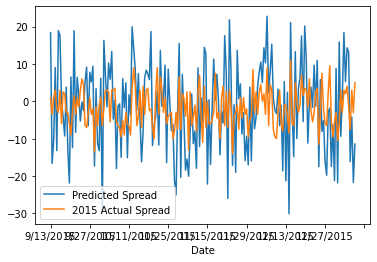

In [ ]:
plt.figure(figsize=(150,150))
betting_opps.plot(x='Date', y=["Predicted Spread", "2015 Actual Spread"])
plt.show()